In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

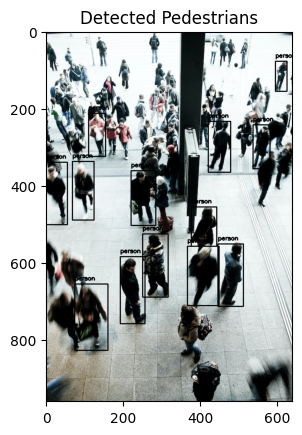

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image using OpenCV
image = cv2.imread("Photo/people2.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Load class names
classes = None
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

Width = image.shape[1]
Height = image.shape[0]

# Read pre-trained model and config file
net = cv2.dnn.readNet('yolo weights/yolov3.weights', 'yolov3.cfg')

# Create input blob
net.setInput(cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False))

# Run inference through the network and gather predictions from output layers
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []

# Create bounding box
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.9:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.9, 0.1)  # confthreshold, nmsthreshold

# Check if it is people detection
for i in indices:
    box = boxes[i]
    if class_ids[i] == 0:  # Class ID 0 corresponds to 'person' in COCO dataset
        label = str(classes[class_ids[i]])
        cv2.rectangle(image, (round(box[0]), round(box[1])), (round(box[0] + box[2]), round(box[1] + box[3])), (0, 0, 0), 2)
        cv2.putText(image, label, (round(box[0]), round(box[1]) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

# Display the image using matplotlib
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Pedestrians")
plt.show()

# Add count of detected people
cv2.putText(image, "Count = " + str(len(indices)), (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

# Display the image with count using OpenCV
cv2.imshow('Pedestrians', image)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [4]:
classes = None
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

# read pre-trained model and config file
net = cv2.dnn.readNet('yolo weights/yolov3.weights', 'yolov3.cfg')

# create input blob 
# set input blob for the network
cap = cv2.VideoCapture("video/test.mp4")

# Loop once video is successfully loaded
while cap.isOpened():
    
    # Read first frame
    ret, img = cap.read()
    scale_percent = 60 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
  
    # resize image
    image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    Width = image.shape[1]
    Height = image.shape[0]

    net.setInput(cv2.dnn.blobFromImage(image, 0.00392, (416,416), (0,0,0), True, crop=False))

    # run inference through the network
    # and gather predictions from output layers
    i = []
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    outs = net.forward(output_layers)
    
    class_ids = []
    confidences = []
    boxes = []

    #create bounding box 
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.9:
                center_x = int(detection[0] * Width)
                center_y = int(detection[1] * Height)
                w = int(detection[2] * Width)
                h = int(detection[3] * Height)
                x = center_x - w / 2
                y = center_y - h / 2
                class_ids.append(class_id)
                confidences.append(float(confidence))
                boxes.append([x, y, w, h])

    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.9, 0.1)

    #check if is people detection
    for i in indices:
        box = boxes[i]
        if class_ids[i]==0:
            label = str(classes[class_id]) 
            cv2.rectangle(image, (round(box[0]),round(box[1])), (round(box[0]+box[2]),round(box[1]+box[3])), (0, 0, 0), 2)
            #cv2.putText(image, label, (round(box[0])-10,round(box[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

    cv2.putText(image, "Count =" + str(len(indices)), (0,20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    
    cv2.imshow('Pedestrians', image)
    if cv2.waitKey(1) == 13: #13 is the Enter Key
        break
    
cap.release()
cv2.destroyAllWindows()